# **Titanic Dataset Machine Learning Project**
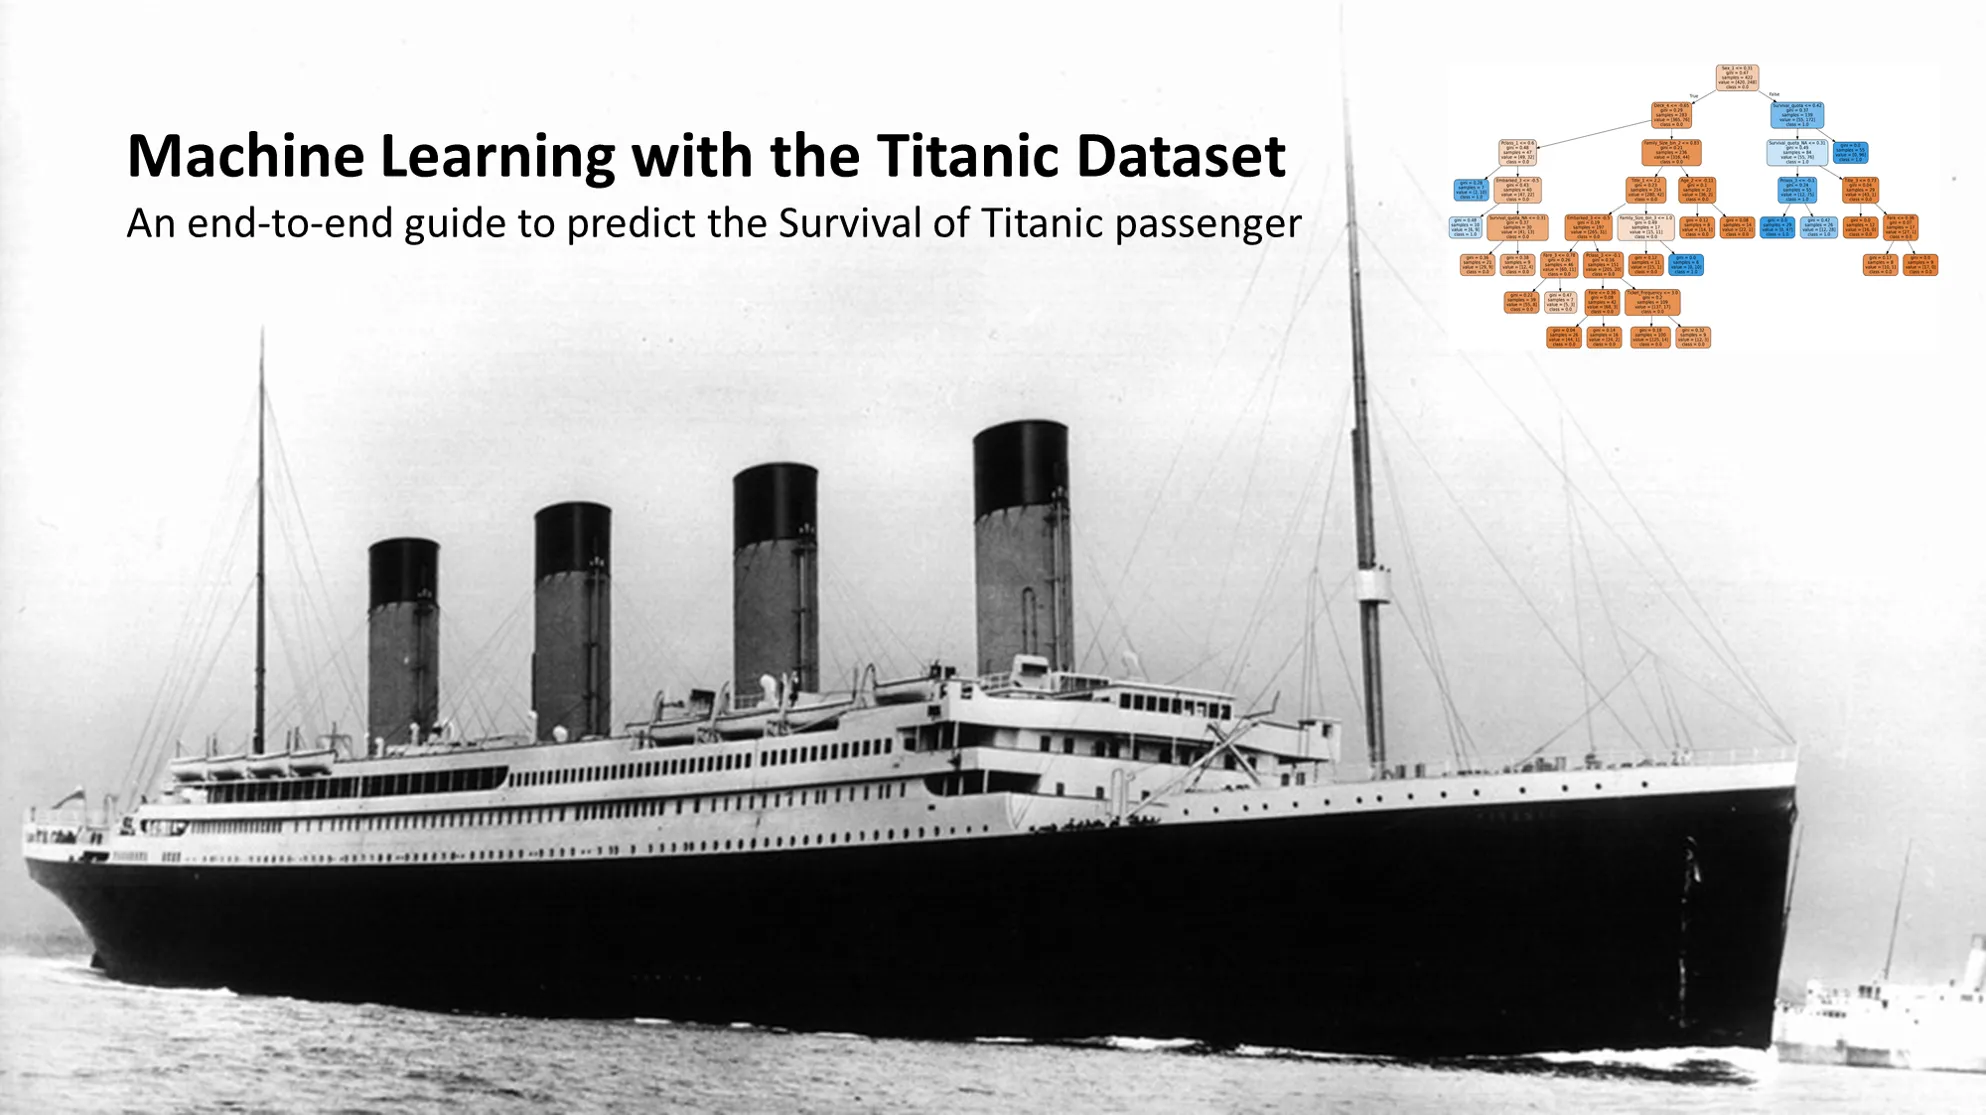

## **Table of Contents**
- [1. Loading Cleaned Data](#1-loading-cleaned-data)
- [2. Data Splitting](#2-data-splitting)
- [3. Model Training](#3-model-selection-and-training)
  - [3.1. Logistic Regression](#31-logistic-regression)
  - [3.2. Decision Tree Classifier](#32-decision-tree-classifier)
  - [3.3. Random Forest Classifier](#33-random-forest-classifier)
  - [3.4. Support Vector Machine (SVM)](#34-support-vector-machine-svm)
  - [3.5. XGBoost Classifier](#35-xgboost-classifier)
- [4. Model Evaluation](#4-model-evaluation)
- [5. Hyperparameter Tuning](#5-hyperparameter-tuning)


In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
import xgboost as xgb
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score, confusion_matrix

### 1. Loading Cleaned Data
- Load the cleaned dataset from the EDA file for use in modeling.



In [37]:
df_train = pd.read_csv('data/train_cleaned.csv')
df_train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Group,Fare_Group
0,1,0,3,12,1,-0.552360,1,0,-0.918474,140,2,0,1
1,2,1,1,13,0,0.659475,1,0,0.923286,81,0,2,0
2,3,1,3,9,0,-0.249401,0,0,-0.868656,115,2,0,1
3,4,1,1,13,0,0.432256,1,0,2.465512,55,2,2,0
4,5,0,3,12,1,0.432256,0,0,-0.859430,115,2,2,1


In [38]:
df_test = pd.read_csv('data/test_cleaned.csv')
df_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Age_Group,Fare_Group
0,892,3,5,1,0.350735,0,0,-0.497063,90,1,0,1
1,893,3,6,0,1.324681,1,0,-0.511926,86,2,2,1
2,894,2,5,1,2.493416,0,0,-0.463754,73,1,3,1
3,895,3,5,1,-0.233633,0,0,-0.482127,90,2,0,1
4,896,3,6,0,-0.623211,1,1,-0.417151,74,2,0,1


### 2. Data Splitting



In [39]:
X = df_train.drop(['Survived', 'PassengerId'], axis=1)
y = df_train['Survived']
print(X.shape,X.shape)

(891, 11) (891, 11)


In [40]:
X_test_final = df_test.drop(['PassengerId'], axis=1)
X_test_final.shape

(418, 11)

In [41]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.1, random_state=42)
print(X_train.shape,y_train.shape,X_val.shape,y_val.shape)

(801, 11) (801,) (90, 11) (90,)



### 3. Model Training

#### 3.1. Logistic Regression

In [42]:
log_reg = LogisticRegression(solver= 'liblinear')
log_reg.fit(X_train, y_train)
y_val_pred_log_reg = log_reg.predict(X_val)

#### 3.2. Decision Tree Classifier

In [43]:
tree_clf = DecisionTreeClassifier(min_samples_split=10,min_samples_leaf=2,criterion='entropy')
tree_clf.fit(X_train, y_train)
y_val_pred_tree = tree_clf.predict(X_val)

#### 3.3. Random Forest Classifier

In [44]:
forest_clf = RandomForestClassifier(bootstrap=True,min_samples_split=15,min_samples_leaf=2)
forest_clf.fit(X_train, y_train)
y_val_pred_forest = forest_clf.predict(X_val)

#### 3.4. Support Vector Machine (SVM)

In [45]:
svm_clf = SVC(probability=True,kernel='linear')
svm_clf.fit(X_train, y_train)
y_val_pred_svm = svm_clf.predict(X_val)

#### 3.5. XGBoost Classifier

In [46]:
xgb_clf = xgb.XGBClassifier(max_depth=2)
xgb_clf.fit(X_train, y_train)
y_val_pred_xgb = xgb_clf.predict(X_val)

### 4. Model Evaluation

In [47]:
# Probabilities
log_reg_probs = log_reg.predict_proba(X_val)[:, 1]
forest_probs = forest_clf.predict_proba(X_val)[:, 1]
svm_probs = svm_clf.predict_proba(X_val)[:, 1]
xgb_probs = xgb_clf.predict_proba(X_val)[:, 1]

In [48]:
metrics = {
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest', 'SVM', 'XGBoost'],
    'Accuracy': [
        accuracy_score(y_val, y_val_pred_log_reg),
        accuracy_score(y_val, y_val_pred_tree),
        accuracy_score(y_val, y_val_pred_forest),
        accuracy_score(y_val, y_val_pred_svm),
        accuracy_score(y_val, y_val_pred_xgb)
    ],
    'Precision': [
        precision_score(y_val, y_val_pred_log_reg),
        precision_score(y_val, y_val_pred_tree),
        precision_score(y_val, y_val_pred_forest),
        precision_score(y_val, y_val_pred_svm),
        precision_score(y_val, y_val_pred_xgb)
    ],
    'Recall': [
        recall_score(y_val, y_val_pred_log_reg),
        recall_score(y_val, y_val_pred_tree),
        recall_score(y_val, y_val_pred_forest),
        recall_score(y_val, y_val_pred_svm),
        recall_score(y_val, y_val_pred_xgb)
    ],
    'AUC': [
        roc_auc_score(y_val, log_reg_probs),
        roc_auc_score(y_val, y_val_pred_tree),  # AUC from predicted labels for decision tree
        roc_auc_score(y_val, forest_probs),
        roc_auc_score(y_val, svm_probs),
        roc_auc_score(y_val, xgb_probs)
    ]
}


In [49]:
df_metrics = pd.DataFrame(metrics)
df_metrics

,Model,Accuracy,Precision,Recall,AUC
0,Logistic Regression,0.833333,0.769231,0.833333,0.916667
1,Decision Tree,0.844444,0.775000,0.861111,0.847222
2,Random Forest,0.855556,0.828571,0.805556,0.902778
3,SVM,0.811111,0.756757,0.777778,0.900720
4,XGBoost,0.855556,0.810811,0.833333,0.912037


In [50]:
y_pred_test_log_reg = log_reg.predict(X_test_final)
y_pred_test_forest = forest_clf.predict(X_test_final)
y_pred_test_xgb= xgb_clf.predict(X_test_final)

In [51]:
df_predictions = pd.DataFrame({
    'Logistic Regression': y_pred_test_log_reg,
    'Random Forest': y_pred_test_forest,
    'XGBoost': y_pred_test_xgb
})

print("\nPredictions DataFrame:")
print(df_predictions)


Predictions DataFrame:
     Logistic Regression  Random Forest  XGBoost
0                      0              0        0
1                      0              0        1
2                      0              0        0
3                      0              0        0
4                      0              0        0
..                   ...            ...      ...
413                    0              0        0
414                    1              1        1
415                    0              0        0
416                    0              0        0
417                    0              0        1

[418 rows x 3 columns]


### 5.Hyperparameter Tuning

In [52]:
param_grid_forest = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search_forest = GridSearchCV(
    RandomForestClassifier(), param_grid=param_grid_forest, 
    cv=5, scoring='accuracy', n_jobs=-1
)
grid_search_forest.fit(X_train, y_train)

forest_best_score = grid_search_forest.best_score_

In [59]:
param_dist_xgb = {
    'n_estimators': [100, 200, 500],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'subsample': [0.6, 0.8, 1.0],
    'colsample_bytree': [0.6, 0.8, 1.0]
}

random_search_xgb = RandomizedSearchCV(
    xgb.XGBClassifier(eval_metric='logloss'), 
    param_distributions=param_dist_xgb, n_iter=10, cv=5, scoring='accuracy', random_state=42, n_jobs=-1
)
random_search_xgb.fit(X_train, y_train)

xgb_best_score = random_search_xgb.best_score_

In [60]:
best_scores = pd.DataFrame({
    'Model': ['Random Forest', 'XGBoost'],
    'Best Score': [forest_best_score, xgb_best_score]
})
best_scores

,Model,Best Score
0,Random Forest,0.832694
1,XGBoost,0.833936


In [61]:
submission_forest = pd.DataFrame({
    'PassengerId': df_test['PassengerId'],
    'Survived': y_pred_test_forest
})

In [62]:
submission_forest.to_csv('data/submission.csv', index=False)